## Setup

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
%matplotlib inline
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier


## Color Classification with ML

In [4]:
df = pd.read_excel('Color RGB List.xlsx')
X = df.drop(['Color'], axis=1)
Y = df['Color']
print(df)

      r    g    b   Color
0   255  255  255   white
1     0    0    0   black
2   217  160   91    gold
3   170  106   53    gold
4   189  125   62    gold
5   198  138   78    gold
6   205  138   66    gold
7   225  198  153   beige
8   237  198  147   beige
9   216  174  118   beige
10  214  168  115   beige
11  233  196  141   beige
12   90  183   39   green
13   72  177   30   green
14   76  135   39   green
15  153  205  103   green
16   87  184   33   green
17   33  121  171    blue
18   31  123  176    blue
19   17  103  170    blue
20   48   84  118    blue
21    2   94  149    blue
22  254  134   29  orange
23  233   99   20  orange
24  236  108   23  orange
25  251  144   54  orange
26  219   89   18  orange


In [5]:
clf = KNeighborsClassifier()
clf.fit(X,Y)
y_pred = clf.predict([[93,166,38]])
print(y_pred)

['green']


## Preprocessing

In [7]:
img = cv2.imread("res.jpg")
print(img.shape)

cv2.imshow('image', img)  
cv2.waitKey(0)
cv2.destroyAllWindows()

(532, 1024, 3)


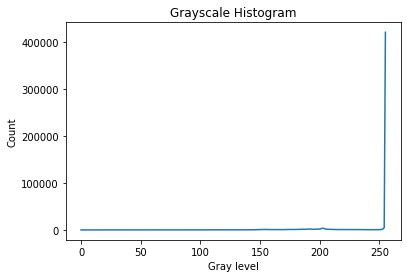

True

In [8]:
# Grayscale
gray = cv2.imread("res.jpg", cv2.IMREAD_GRAYSCALE)
cv2.imshow('gray', gray)  
cv2.waitKey(0)
cv2.destroyAllWindows()


# Plot histogram
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(hist) 
plt.title("Grayscale Histogram")
plt.xlabel("Gray level")
plt.ylabel("Count")
plt.show()


# Binarize image by thresholding
threshold = 250
bin_img = gray.copy()
bin_img[bin_img < threshold] = 0
bin_img[bin_img >= threshold] = 255

cv2.imshow('bin_img', bin_img)  
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('bin_img.jpeg', bin_img)

In [9]:
# Mask
kernel = np.ones((5,5), np.uint8) 
mask = cv2.erode(bin_img, kernel, iterations=3) 


cv2.imshow('mask', mask) 
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('mask.jpeg', mask)

True

## Color Identification

In [10]:
copy = img
sliceValue = 150

copy = copy[:sliceValue]

cv2.imshow('copy', copy)  
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
# Color helper functions
colors = {'red': (255,0,0),
          
          'green': (0,255,0),
          #'green': (68,181,32),
          #'green': (149,213,128),
          
          'blue': (0,0,255),
          #'blue': (59,134,180),
          #'blue': (26,86,141),
                    
          'yellow': (255,255,0),
          
          'orange': (255,127,0),
          'orange': (249,110,11),
          
          'white': (255,255,255),
          'black': (0,0,0),
          
          #'gray': (127,127,127),
          #'pink': (255,127,127),
          #'purple': (127,0,255),
          
          'beige': (233,196,141),
          'beige': (215,171,117),
          
          #'gold': (217,160,91),
          #'gold': (189,125,62),
         }

def distance(left, right):
    return sum((l-r)**2 for l, r in zip(left, right))**0.5

class NearestColorKey(object):
    def __init__(self, goal):
        self.goal = goal
    def __call__(self, item):
        return distance(self.goal, item[1])

def avgPixel(array):
    temp = (0,0,0)
    for p in array:
        temp += p
    
    result = temp // len(array)
    return result


In [12]:
# Test color helpers
result = min(colors.items(), key=NearestColorKey((10,10,100)))
print(result)

result = min(colors.items(), key=NearestColorKey(img[150][10]))
print(result)


('black', (0, 0, 0))
('white', (255, 255, 255))


In [13]:
# Setup for color identification
'''h = 150
lineWidth = 10

line = img[h-lineWidth//2 : h+lineWidth//2]
#print(line)
print(line.shape)
print(len(line))

height, width, depth = line.shape

result = []
for w in range(width):
    bundle = line[0:lineWidth][w][:]
    print(bundle.shape)'''
    

'h = 150\nlineWidth = 10\n\nline = img[h-lineWidth//2 : h+lineWidth//2]\n#print(line)\nprint(line.shape)\nprint(len(line))\n\nheight, width, depth = line.shape\n\nresult = []\nfor w in range(width):\n    bundle = line[0:lineWidth][w][:]\n    print(bundle.shape)'

In [15]:
# Color identification
h = 150
lineWidth = 10

line = img[h]
#line = img[h-lineWidth//2 : h+lineWidth//2]
print(line.shape)

#print(line)

foundColorsSet = set()
foundColorsArray = []


i = 0
batchSize = 1
startFlag = False
increment = 1

while(i + batchSize < len(line)):
    #print(line[i])
    
    pixel = line[i]
    
    # Moving average
    #pixels = line[i : i+batchSize]
    #pixel = avgPixel(pixels)
                     
    #color = min(colors.items(), key=NearestColorKey(pixel))
    #color = color[0]
    
    color = clf.predict([pixel])
    color = color[0]
    print(color)
    
    if(color == 'beige'):
        startFlag = True
        
    if(startFlag and color != 'white' and color != 'beige'):
        if(color not in foundColorsSet):
            foundColorsSet.add(color)
            foundColorsArray.append(color)
    i += increment


print("Colors found: ", foundColorsArray)



(1024, 3)
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige
beige


## Calculate Resistance

In [12]:
colorValues = {
    'black': 0,
    'brown': 1,
    'red': 2,
    'orange': 3,
    'yellow': 4,
    'green': 5,
    'blue': 6,
    'purple': 7,
    'gray': 8,
    'white': 9
}

print(foundColorsArray)

values = [colorValues[c] for c in foundColorsArray]
print(values)

['green', 'orange', 'blue']
[5, 3, 6]


In [15]:
resistance = 0
values = [colorValues[c] for c in foundColorsArray]

numBands = len(foundColorsArray)

if(numBands == 3):    
    resistance = (values[0]*10 + values[1]) * (10 ** values[2])
    print(resistance)

    
    

53000000
